### Ensemble techniques

Ensemble techniques is a technique which is has an underlying idea where we aggregate predictions from group of predictors,Which may be classifiers and regressor's,in sometimes it gives better performance comapred to using one single model.Simply speak, It uses the combination one or more models to covert weak learners in to strong learner's. Thus the output predicted based on the majority of the votes.

The idea behind the Ensemble approach to the usecase is to use the multiple models get a high performance on the data.

__Ensemble techniques__
* Bagging.
* Boosting.
* Stacking.

__Bagging(Bootstrap technique)__

Bagging is a type of  ensemble technique in which single training algorithem is used on different subsets of the training data where the subset sampling is done with replacement(bootstrap). Once the algorithem is trained on all the subsets, then bagging makes the prediction by aggrigating all the predictions made by the algorithem on the different subsets.In case of regression problem, the bagging aggregate the mean of all the predictors, in case of classification it simply takes the majority of the predictor from the group of predictin's.

<img src="2.png">

<img src="3.PNG">

__Advantages__:

1. Bagging prevents the model from overfitting.
2. It work's well, even if the data is large.
3. Generally it give's or model Low bias, Low variance.
4. Computational time is less.
5. It automatically perform's feature selection.
6. It can handle outlier's.
7. Instead of using single model, It uses multiple as it may increases the performance on the given dataset.
8. Feature scaling is not required.
9. Easy to implement and understand.

__Limitations__:
    
The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability i.e. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost.


### Pasting.

Pasting is an ensemble technique similar to a bagging with only difference is that there is no replacement done while sampling on the training data. This causes less diversity in sampled dataset and data end's up with being correlated.Thus bagging is more powerfull than pasting in real scenarios.

Let's implement the RandomForest

In [202]:
#Import the libraries
import pandas as pd
import numpy as np

In [203]:
#Load the data
from sklearn import datasets
df_1=datasets.load_boston()
df=pd.DataFrame(data=df_1.data)
df.columns=df_1.feature_names
df['Target']=df_1.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check the last five rows of the data

In [204]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Get the size or shape of the data

In [205]:
print('No of records: ',df.shape[0])
print('No of Variables: ',df.shape[1])

No of records:  506
No of Variables:  14


Get the column names 

In [206]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

Check the description of the data

In [207]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check the info of the given dataset

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Check any missing values are present in the data.

In [209]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

Hence there is no missing data, We don't need to worry about the feature engineering.

Check the data type,Unique values of the each variable

In [210]:
count_data=pd.DataFrame({'Dtype':df.dtypes,'Unique':df.nunique()})
count_data

,Dtype,Unique
CRIM,float64,504
ZN,float64,26
INDUS,float64,76
CHAS,float64,2
NOX,float64,81
RM,float64,446
AGE,float64,356
DIS,float64,412
RAD,float64,9
TAX,float64,66


Correlation plot

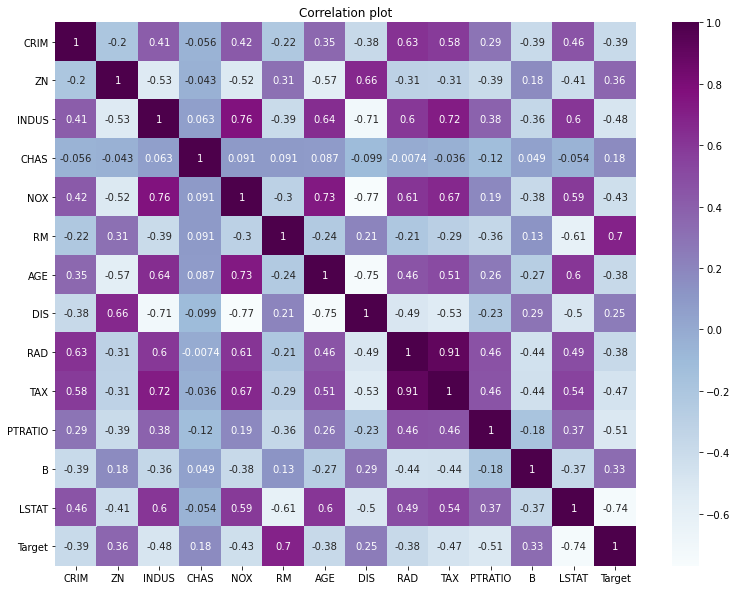

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.title('Correlation plot')
plt.show()

As we noticed that some of the variables are correlated with each other. So we need to check the __VIF__ Score it represents the wheather there is a collinearity between the variables or not.

Check the distribution of the each variable with the help of Distplot

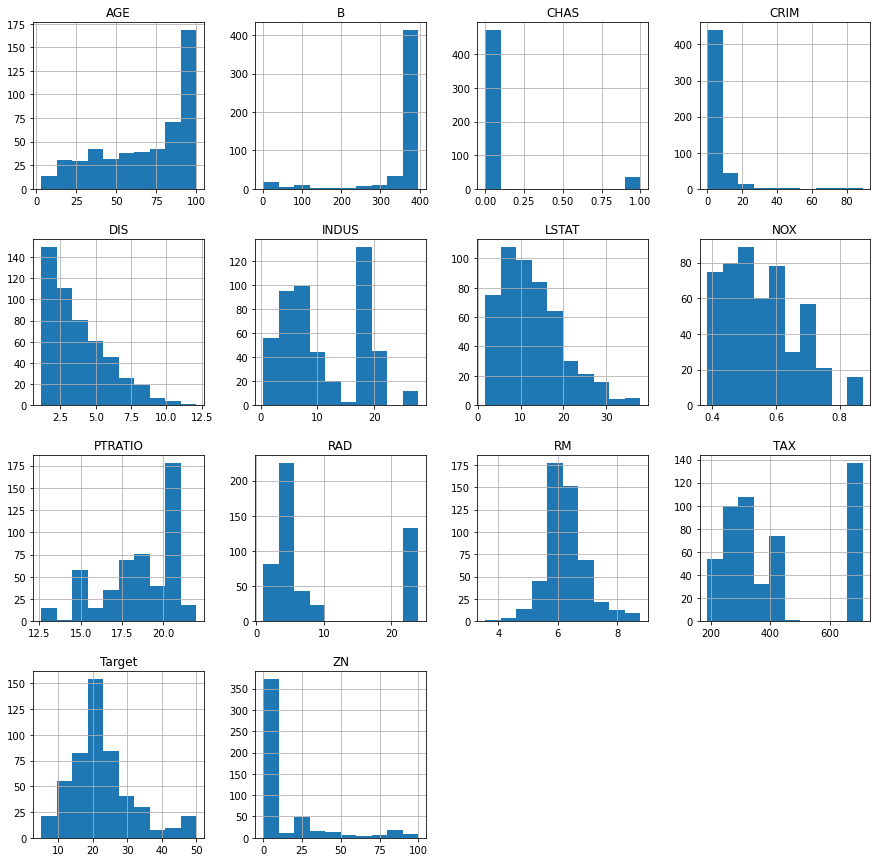

In [212]:
df.hist(figsize=(15,15))
plt.show()

Check any outlier are present in the data with the help of Boxplot or scatterplot

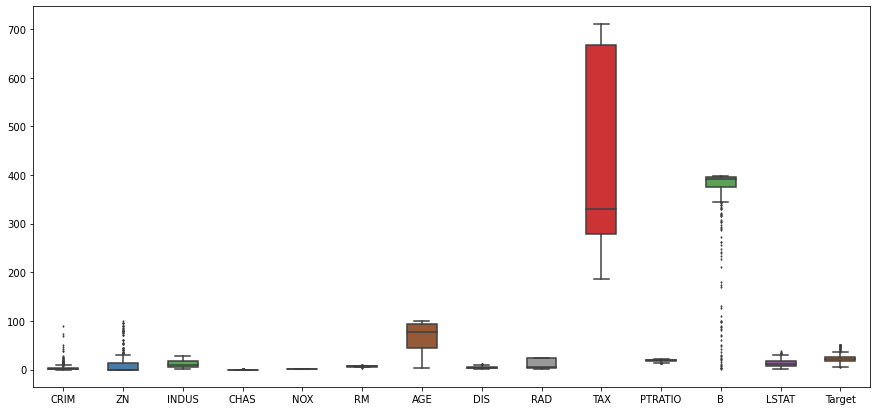

In [213]:
fig,axes=plt.subplots(figsize=(15,7))
sns.boxplot(data=df,fliersize=1.2,width=0.5,ax=axes,palette='Set1')

The variables such as 'B','CRIM','ZN' has most of the outliers we need to take care of those variables otherwise it will impact on our model performance.

In [214]:
df_new=df.copy()

Splitting the data in to train and test split for model training approach

In [215]:
x=df_new.drop('Target',1)
y=df_new['Target']

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [217]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Model building

In [218]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

Check the training score and test score.

In [219]:
print('Training score: ',rf.score(x_train,y_train))
print('Testing score: ',rf.score(x_test,y_test))

Training score:  0.9831446691489386
Testing score:  0.7606169606115564


Have you seen that our model is perform well in our training data but whenever the test data comes in to picture it leads to be overfitting.

Hyper parameter tuning.

Parameters of RandomForestRegressor(
n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None)

In [220]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
param={'n_estimators':[100,300,400,600],
      'criterion':['mse','mae'],
      'max_depth':[2,5,8,10],
      'max_features':['auto','sqrt','log2']}
rf_model=RandomForestRegressor()
rf_hyp=RandomizedSearchCV(estimator=rf_model,param_distributions=param,cv=10,random_state=0,verbose=3,n_iter=10,n_jobs=-1,scoring='neg_mean_squared_error')
rf_hyp.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 300, 400, 600]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=3)

In [221]:
rf_hyp.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=8, max_features='sqrt',
                      n_estimators=400)

In [222]:
rf_hyp.best_params_

{'n_estimators': 400,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'mae'}

In [223]:
rf_new_model=rf_hyp.best_estimator_
rf_new_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=8, max_features='sqrt',
                      n_estimators=400)

In [230]:
rf_pred=rf_new_model.predict(x_test)

In [231]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE: ',mean_absolute_error(y_test,rf_pred))
print('MSE: ',mean_squared_error(y_test,rf_pred))
print('R2: ',r2_score(y_test,rf_pred))

MAE:  3.015578431372545
MSE:  26.85405646905633
R2:  0.6702128055206518


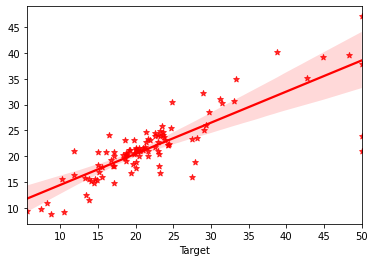

In [233]:
sns.regplot(y_test,rf_pred,color='r',marker='*')